<a href="https://colab.research.google.com/github/tejasvaidhyadev/map_viz/blob/main/nlpforssg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This Note Contains the code for the following dataviz
- NLP topic extraction and graph 
- World Maps color according to response to country

**Uploading of Responses of Survey**


In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving What is NLP for Social Good_  (Responses) - Form Responses 1.csv to What is NLP for Social Good_  (Responses) - Form Responses 1.csv
User uploaded file "What is NLP for Social Good_  (Responses) - Form Responses 1.csv" with length 91510 bytes


In [2]:
!mv What\ is\ NLP\ for\ Social\ Good_\ \ \(Responses\)\ -\ Form\ Responses\ 1.csv data.csv # renaming of file

In [3]:
ls #checking directory strucuture

data.csv  sample_data/


In [4]:
# -*- coding: utf-8 -*-
# some important libraray
import plotly.offline as py
import plotly.graph_objs as go

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.cm as cmx



In [123]:
# Reading CSV file
df = pd.read_csv("data.csv", sep=",")

Hash Map for column name


In [7]:
column = {i: c for i, c in enumerate(df.columns)}
column

{0: 'Timestamp',
 1: 'When talking about NLP for Social Good (NLP4SG), in your opinion, how aware is the NLP research community of the social impact of NLP?',
 2: 'How much potential do you think NLP has in bringing social good in the long run?',
 3: '(Question 1) As far as you know, what are some current NLP topics that have social good impact? Please list one per line, following the format "<Topic>: <Type of Social Good Impact>" (please try to list two or more; "N/A" if you are not aware of any)',
 4: ' (1a) What are some representative references for NLP for social good? E.g., specific papers, tutorials, talks, researchers, etc. Please list one per line following the format "<Reference>: <Type of Social Good Impact>" (please try to list two or more; "N/A" if you are not aware of any)',
 5: '(Question 2) As far as you know, what are some research directions with potential negative social impact or dual use that you believe should not be/have been pursued? Why, and at what level they 

In [11]:
df_carrier_stage = df[column[9]]

In [8]:
import re
df_processed = df_carrier_stage.apply(lambda x: re.findall(r"[\w']+|[.,!?;]", str(x)) )
list_carriers  = df_processed.to_list()

In [47]:
text = " ".join(flatten(list_carriers))
words = text.split()
words = [word.strip('.,!;()[]') for word in words]
words = [word.replace("'s", '') for word in words]

#finding unique
unique = []
for word in words:
    if word not in unique:
        unique.append(word)

#sort
unique.sort()


In [280]:
unique# keeping redoc in industry

In [88]:
# some random modification
final_list =[]
for carriers in list_carriers:
  updated_list =[]
  for carrier in carriers:
    if carrier.lower() == "scientist":
      updated_list.append("Scientist")
    
    if carrier.lower() == "postdoct":
      updated_list.append(carrier)
    if carrier.lower() == "academia":
      updated_list.append(carrier)
    if carrier.lower() == "undergraduate" or carrier.lower() == "Undergrad":
      updated_list.append("Undergraduate") 
    if carrier.lower() == "master":
      updated_list.append("Master")
    if carrier.lower() == "phd":
      updated_list.append(carrier)
    if carrier.lower() == "professor":
      updated_list.append(carrier)
    if carrier.lower() == "industry":
      updated_list.append("Industry")
    if carrier.lower() == "corporate":
      updated_list.append("Industry")
    if carrier.lower() == "postdoc":
      updated_list.append("Postdoc")
    if carrier.lower() == "government":
      updated_list.append(carrier)
    if carrier.lower() == "research" or carrier.lower() == "researcher":
      updated_list.append("Research")
    if carrier.lower() == "etc" or carrier.lower() == "NGO" or carrier.lower() == "other":
      updated_list.append("Other")
  final_list.append(updated_list)

In [183]:
def flatten(t):
    return [item.lstrip() for sublist in t for item in sublist]


In [90]:
from collections import Counter
list1=flatten(final_list)
counts = Counter(list1)

In [91]:
final = Counter(counts)

In [94]:
df_carrier_clean = pd.DataFrame.from_dict(final, orient='index').reset_index()

In [112]:
df_carrier_clean

,index,0
0,PhD,20
1,Research,37
2,Scientist,28
3,Undergraduate,5
4,Master,6
5,Postdoc,6
6,Professor,28
7,Academia,59
8,Industry,12
9,Other,29


In [113]:
df_carrier_clean = df_carrier_clean.rename(columns={"index": "Profession", 0: "number of people"})
df_carrier_clean.set_index("Profession")

,number of people
Profession,
PhD,20
Research,37
Scientist,28
Undergraduate,5
Master,6
Postdoc,6
Professor,28
Academia,59
Industry,12


In [106]:
import matplotlib.pyplot as plt

In [118]:
df_carrier_clean.hist(bins=40, grid=False, figsize=(12,8), color='#8000F0', rwidth=0.9)

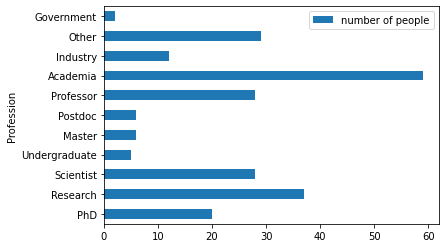

In [236]:
df_carrier_clean.plot(kind='barh',x='Profession',y='number of people' )

In [45]:
def Punctuation(string):
 
    # punctuation marks
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 
    # traverse the given string and if any punctuation
    # marks occur replace it with null
    for x in string:
        if x in punctuations:
            string = string.replace(x, "")
 
    # Print string without punctuation
    print(string)


In [ ]:
re.sub(r" ?\([^)]+\)", "", item)

In [ ]:
# column[8] is Reserch area

In [182]:
list_nlp_topic = df[column[8]].dropna().apply(lambda x: re.sub(r" ?\([^)]+\)", "", str(x).lower().replace('and', '').replace('; ', ', ').lstrip()
).split(",")).tolist()

In [207]:
from collections import Counter
list1=flatten(list_nlp_topic)
counts = Counter(list1)

In [208]:
df_clean_topics = pd.DataFrame.from_dict(counts, orient='index').reset_index()

In [209]:
df_clean_topics
df_clean_topics = df_clean_topics.rename(columns={"index": "Topics", 0: "Frequency of Occurrence"})
df_clean_topics = df_clean_topics.set_index("Topics")


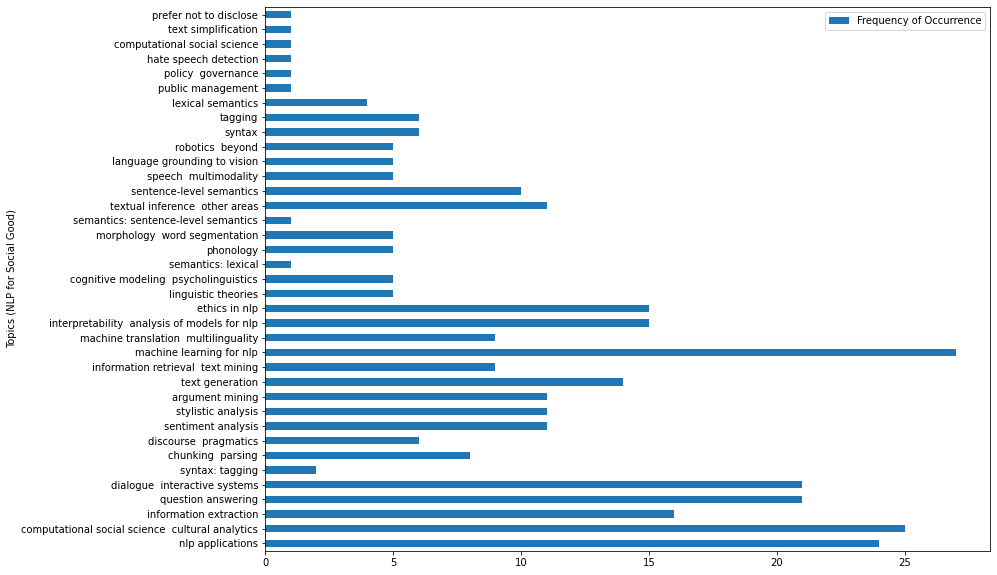

In [234]:
df_clean_topics.plot(kind='barh',figsize=(13,10), xlabel="Topics (NLP for Social Good)", ylabel= "Frequency of Occurrence in Survey")

In [173]:
#text = " ".join(flatten(list_nlp_topic))
#words = [word.strip('.,!;()[]') for word in words]
#words = [word.replace("'s", '') for word in words]
words = flatten(list_nlp_topic)
#finding unique
unique = []
for word in words:
    if word not in unique:
        unique.append(word)

#sort
unique.sort()
# to check unique list of words

Number of year of NLP experience 

In [242]:
def keep_int(int_str): # only keep the integer part of string
  digit  = int(re. search(r'\d+', int_str). group())
  return digit

In [239]:
name_year_df = df[column[10]]
name_year_df = name_year_df.dropna()

In [237]:
import re
import matplotlib.pyplot as plt

In [243]:
name_year_df =name_year_df.apply(lambda x: int(keep_int(x) ))

In [244]:
df_carrier_stage = df[column[9]]
df_carrier_stage = df_carrier_stage.dropna()

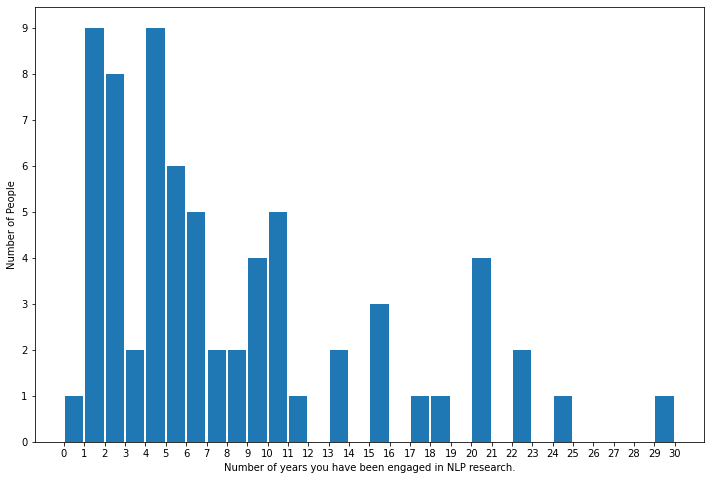

In [246]:
name_year_df.hist(bins=[i for i in range(31)], grid=False, figsize=(12,8), rwidth=0.9)
plt.xlabel('Number of years you have been engaged in NLP research.')
plt.ylabel('Number of People')
plt.xticks(range(0,30+1))
plt.yticks(range(0,10))
plt.show()

# Create Cool Maps




In [249]:
df_work_origin = df[[column[11],column[12]]]

In [250]:
df_work_origin = df_work_origin.dropna()

In [251]:
df_work_origin[column[11]] = df_work_origin[column[11]].apply(lambda x: re.sub(r'[^\w\s]', '', (str(x).split("/")[-1])))
df_work_origin[column[12]] = df_work_origin[column[12]].apply(lambda x: re.sub(r'[^\w\s]', '', (str(x).split("/")[-1])))

In [ ]:
df_exp.to_csv("randomsite.csv")

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="world-Map-NLP")
# function to get lat and long
import numpy as np
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan


In [ ]:
df_work_origin['work_location_cordinate'] = df_work_origin[column[11]].apply(geolocate)
df_work_origin['origin_location_cordinate'] = df_work_origin[column[12]].apply(geolocate)

In [ ]:
map_origin_data = df_work_origin['origin_location_cordinate'].value_counts()

In [ ]:
data = [[i, map_origin_data[i]]for i in map_origin_data.keys()]

In [ ]:
df_exp = pd.DataFrame(data, columns = ['corrdinate', 'count'])

In [ ]:
df_exp.head()

,corrdinate,count
0,"(39.7837304, -100.4458825)",17
1,"(35.000074, 104.999927)",11
2,"(22.3511148, 78.6677428)",7
3,"(51.0834196, 10.4234469)",4
4,"(31.5313113, 34.8667654)",3


In [248]:
import plotly.graph_objects as go

In [265]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [271]:
column[12]

'Country of origin ("N/A" if prefer not to disclose)'

**Color Mapping the Country**

In [279]:
#Convert to dictionary
counts = df_work_origin[column[12]].dropna().value_counts().to_dict()

#Country names
def getList(dict): 
    return [*dict]

countrs = getList(counts)

#Frequency counts
freqs = list(counts.values())

#Plotting
data = dict(
        type = 'choropleth',
        colorscale = 'Blues',
        reversescale = True,
        locations = countrs,
        locationmode = "country names",
        z = freqs,
        text = df_work_origin[column[12]],
        colorbar = {'title' : 'Number of Survey Response'},
      ) 

layout = dict(title = 'Country of origin',
                geo = dict(showframe = False)
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [273]:
#Convert to dictionary
counts = df_work_origin[column[11]].dropna().value_counts().to_dict()

#Country names
def getList(dict): 
    return [*dict]

countrs = getList(counts)

#Frequency counts
freqs = list(counts.values())

#Plotting
data = dict(
        type = 'choropleth',
        colorscale = 'Greens',
        locations = countrs,
        locationmode = "country names",
        z = freqs,
        text = df_work_origin[column[11]],
        colorbar = {'title' : 'Number of Survey Response'},
      ) 

layout = dict(title = 'Country of Current Work',
                geo = dict(showframe = False)
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)


In [280]:
#Convert to dictionary
counts = df_work_origin[column[11]].dropna().value_counts().to_dict()

#Country names
def getList(dict): 
    return [*dict]

countrs = getList(counts)

#Frequency counts
freqs = list(counts.values())

#Plotting
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = countrs,
        locationmode = "country names",
        z = freqs,
        text = df_work_origin[column[11]],
        colorbar = {'title' : 'Number of Users'},
      ) 

layout = dict(title = 'Number of Users per Country',
                geo = dict(showframe = False)
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [ ]:
df_exp.iloc[1]['corrdinate']

(35.000074, 104.999927)

In [ ]:
folium.map.Marker

folium.map.Marker

In [ ]:
import folium.plugins
from folium.plugins import MarkerCluster as mc

#empty map
world_map= folium.Map(tiles="cartodbdark_matter")
marker_cluster = mc().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df_exp)):
        latnlong = df_exp.iloc[i]['corrdinate']
        radius=df_exp.iloc[i]['corrdinate']
        folium.map.Marker(location = latnlong
).add_to(marker_cluster)

#show the map
world_map




Work In Progress 



In [ ]:
df = px.df_exp()
geojson = px.data.election_geojson()


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()
candidates = df.winner.unique()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Candidate:"),
    dcc.RadioItems(
        id='candidate', 
        options=[{'value': x, 'label': x} 
                 for x in candidates],
        value=candidates[0],
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="choropleth"),
])

@app.callback(
    Output("choropleth", "figure"), 
    [Input("candidate", "value")])
def display_choropleth(candidate):
    fig = px.choropleth(
        df, geojson=geojson, color=candidate,
        locations="district", featureidkey="properties.district",
        projection="mercator", range_color=[0, 6500])
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

    return fig

app.run_server(debug=True)
